# Absenteeism at Work

This project conducts exploratory analysis on employee records from a courier company in Brazil and aims to predict absenteeism in hours, assuming this is a linear regression problem.

### Toolkit 

In [11]:
#Dependencies

# TO CLEAN DATA
import pandas as pd
import numpy as np

# TO VISUALIZE DATA
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# TO PREDICT DATA
from sklearn.metrics import confusion_matrix

## About our data

This dataset is available from the UCI Machine Learning Repository. Records are dated from July 2007 to July 2010. <br>

5124 employee records with information on hours of absence, reason for absence, date of absence, and etc.

See [documentation](https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) for full list of attributes. 

In [18]:
# load dataset through pandas
emp_data=pd.read_excel('Absenteeism_at_work.xls')

In [19]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    emp_data[i] = emp_data[i].astype("category")

for i in numerical_set :
    emp_data[i] = emp_data[i].astype("float64")  

In [20]:
emp_data.shape
emp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26,7,3,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,4.0
1,36.0,0,7,3,1,118.0,13.0,18.0,50.0,239554.0,...,1,1,1.0,1,0,0.0,98.0,178.0,31.0,0.0
2,3.0,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0
3,7.0,7,7,5,1,279.0,5.0,14.0,39.0,239554.0,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,4.0
4,11.0,23,7,5,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,2.0


### Lets get to know the employees
1. 85% have high school level education. The remaining 15% have graduate, postgraduate and/or doctorate education.
2. 68% of employees have 1, 2, 3 or 4 kids.
3. 63% of employees are social drinkers.
4. 93% of employees are social smokers.
5. 61% of employees don't have pets. 24% have one pet. 

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


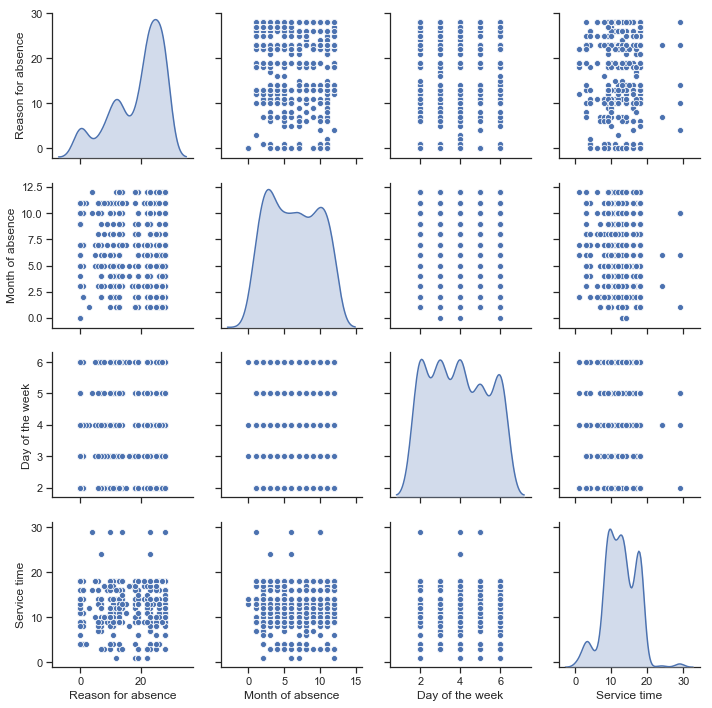

In [14]:
# Visualize data
sns.pairplot(emp_data[["Reason for absence", "Month of absence", "Day of the week", "Service time"]], diag_kind="kde")

### Top 3 Reasons for Absence

* Diseases of the musculoskeletal system and connective tissue (842 cases)
* Injury, poisoning and certain other consequences of external causes (729 cases)
* Diseases of the digestive system (297 cases)

### Most popular months of absence

* March (765 cases)
* July (734 cases)
* April (482)

### Least popular months of absence

* January (222 cases)
* August (288 cases)
* September (292 cases)

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


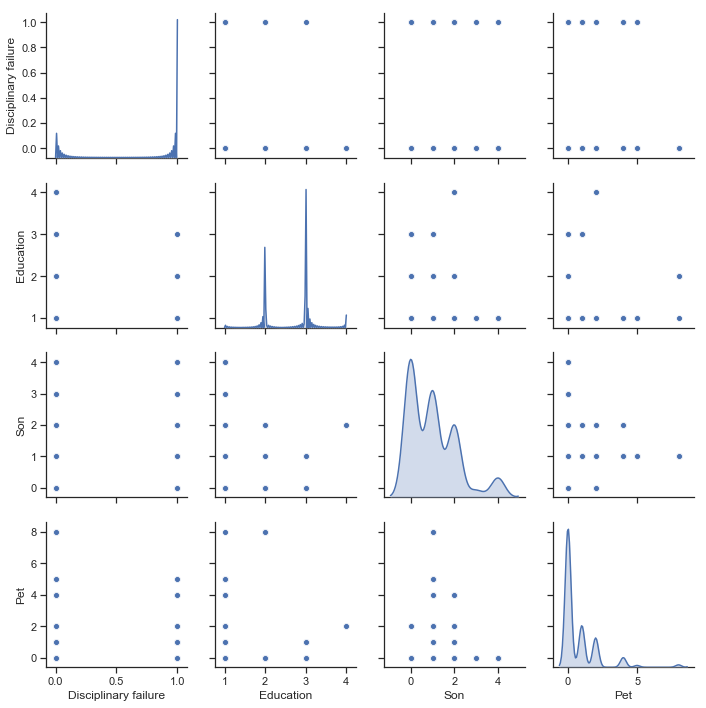

In [15]:
# Visualize data
sns.pairplot(emp_data[["Disciplinary failure", "Education", "Son", "Pet"]], diag_kind="kde")

C:\Users\Laura Sun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


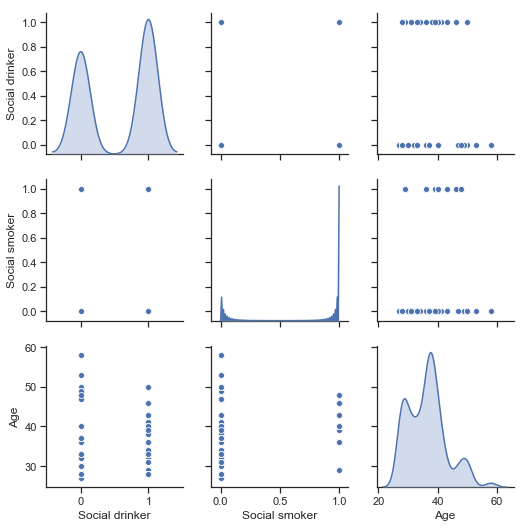

In [17]:
# Visualize data
sns.pairplot(emp_data[["Social drinker", "Social smoker", "Age"]], diag_kind="kde")

# Building ML Models
split, fit and predict

### Before we trained our model, we separated our label (hours of absence). 

In [37]:
# Trying to predict Y variable
X = emp_data.drop("Absenteeism time in hours", axis=1)
y = emp_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(740, 20) (740,)


### We chose to split our data 80:20 for training and testing

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression Model 1

In [24]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [25]:
model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)


# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")


Mean Squared Error (MSE): 111.17567567567568
R squared (R2 ): -0.020206455072560914


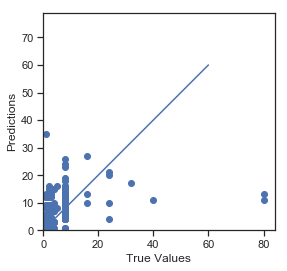

In [26]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-60, 60], [-60, 60])

##### Our predicted values were not very accurate or ideal.

# Logistic Regression Model 2

Logistic regression models will generate probabilities and is typically used in binary classification problems. 
This doesn't apply to our project, but we were curious to see what kind of results logistic regression would yield. And the results were so bad that our r square was negative. 

In [27]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [28]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 212.57432432432432
R-squared (R2 ): -0.9506937694808462


C:\Users\Laura Sun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Laura Sun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree Model 3

This model is made up of a sequence of branching statements where the nodes as T/F question and the leafs represent T or F. The goal is to keep splitting nodes until we reach maximum accuracy while minimising the number of splits. Although this is an ideal approach for datasets with continuous variables, our MSE was too high and our r square was too low.

In [29]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()

In [30]:
model3.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 256.3378378378378
R-squared (R2 ): -1.3522907799041461


# Random Forest Model 4 (n_estimators=100)

This model uses decision trees but builds these forests of decision trees from a random selection of features. 

In [31]:
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=100)

In [32]:
model4.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model4.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 119.0608108108108
R-squared (R2 ): -0.09256460099875996


# KNN Model 5 (k=35)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 0.970/0.270
k: 3, Train/Test Score: 0.596/0.311
k: 5, Train/Test Score: 0.525/0.291
k: 7, Train/Test Score: 0.481/0.304
k: 9, Train/Test Score: 0.451/0.264
k: 11, Train/Test Score: 0.431/0.264
k: 13, Train/Test Score: 0.419/0.250
k: 15, Train/Test Score: 0.416/0.297
k: 17, Train/Test Score: 0.409/0.270
k: 19, Train/Test Score: 0.395/0.223
k: 21, Train/Test Score: 0.397/0.257
k: 23, Train/Test Score: 0.382/0.216
k: 25, Train/Test Score: 0.373/0.230
k: 27, Train/Test Score: 0.375/0.230
k: 29, Train/Test Score: 0.377/0.230
k: 31, Train/Test Score: 0.375/0.230
k: 33, Train/Test Score: 0.367/0.236


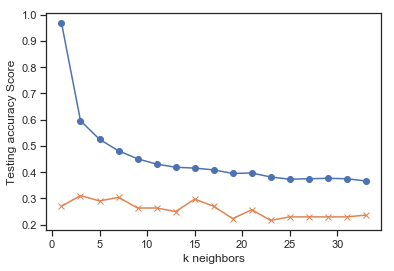

In [34]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 35, 2), train_scores, marker='o')
plt.plot(range(1, 35, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [35]:
#No need to run model as we can see only the initial data will give us a close accuracy level code below

In [36]:
#model5=KNeighborsClassifier(n_neighbors=??)

In [ ]:
#model5.fit(X_train, y_train)
#model5.fit(X_test, y_test)

#print('k=?? Test Acc: %.3f' % model5.score(X_train, y_train))
#print('k=?? Test Acc: %.3f' % model5.score(X_test, y_test))

In [ ]:
# Calculate classification report
#from sklearn.metrics import classification_report
#predictions = model6.predict(X_test)
#print(classification_report(y_test, predictions,y=y))

## Conclusion

We could not conclude whether this was a linear regression problem.

## Next steps

1. Perform outlier analysis and tweak our features to improve our machine learning models. 
2. Transfer data visualizations to the web